In [21]:


!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py"
!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkplot.py"

--2020-04-06 16:28:54--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47674 (47K) [text/plain]
Saving to: ‘thinkdsp.py.1’

thinkdsp.py.1       100%[===================>]  46.56K  --.-KB/s    in 0.02s   

2020-04-06 16:28:54 (2.23 MB/s) - ‘thinkdsp.py.1’ saved [47674/47674]

--2020-04-06 16:28:56--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkplot.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22756 (22K) [text/plain]
Saving to: 

In [0]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

In [0]:
from thinkdsp import Sinusoid
import numpy as np

class TriSignal(Sinusoid):
        
    def evaluate(self, ts):
    
        θ= ts * 2 * np.pi * self.freq + self.offset # 在此作橫軸之變數變換

        θ= θ % (np.pi * 2) 

        x0= θ *(-2/np.pi) +1
        x1= θ *(+2/np.pi) -3

        x= x0 * (θ<np.pi) + x1 * (θ>=np.pi) 

        x= x * self.amp 
        return x

class SqrSignal(Sinusoid):
        
    def evaluate(self, ts):
    
        θ= ts * 2 * np.pi * self.freq + self.offset

        θ= θ % (np.pi * 2) 

        x0= -1 
        x1= +1 

        x= x0 * (θ<np.pi) + x1 * (θ>=np.pi) 

        x= x * self.amp 

        return x       


class SawtoothSignal(Sinusoid):
        
    def evaluate(self, ts):
    
        θ= ts * 2 * np.pi * self.freq + self.offset

        θ= θ % (np.pi * 2) 

        x= -1 + θ/np.pi 
       
        x= x * self.amp 

        return x

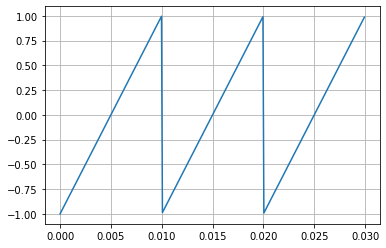

In [24]:
import matplotlib.pyplot as pl


x= SawtoothSignal(freq=100)
x.plot()
pl.grid()

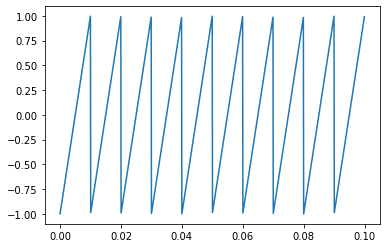

In [19]:
w= x.make_wave()
w.segment(duration=.1).plot()
w.make_audio()

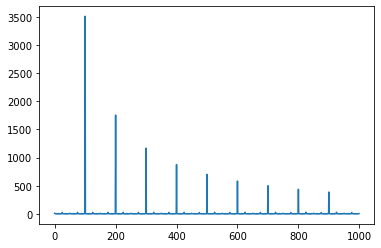

In [20]:
s= w.make_spectrum()
s.plot(high=1000)